In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import argparse
import helpers
import os
from matplotlib import pyplot as plt

import numpy as np
import networkx as nx
from sklearn.metrics import log_loss
from decentralized_SGD_logistic import DecentralizedSGDLogistic
from sklearn.linear_model import SGDClassifier

## Higgs Boson Dataset

In [3]:
def run_logistic(A, y, param):
    m = DecentralizedSGDLogistic(**param)
    list_losses = m.fit(A, y, logging=True)
    print('Final score: {0:.4f}'.format(m.score(A, y)))
    return list_losses, np.arange(0.0, len(list_losses)) * m.compute_loss_every

## Load dataset

In [4]:
y, A = helpers.load_data()

## Compute the baseline with SGD classifier 

In [5]:
# Fit a SGD
clf = SGDClassifier(loss='log', penalty='l2', alpha =1/A.shape[0], tol=1e-4, n_jobs=1, random_state=2)
clf.fit(A, y)

accuracy = clf.score(A, y)
optimum_x = clf.predict_proba(A)[:, 1]

# Optimal loss, useful for plots
optimum_loss = (-(y.T.dot(np.log(optimum_x)) + (1 - y).T.dot(np.log(1 - optimum_x))) / A.shape[0])

print('Accuracy:', accuracy)
print('Final loss:', optimum_loss)

Accuracy: 0.747132
Final loss: 0.5057994169435835


### Computing with Decentralized SGD with basic topologies (disconnected, torus, complete, ring)

In [6]:
reg = 1 / A.shape[0]
n_features = A.shape[1]
n_machines = [900, 2500,6400]

params = dict(num_epoch=5, lr_type='bottou',
                           initial_lr=0.2, regularizer=reg,
                           quantization_method='full', n_machines=0,
                           communication_method='plain',topology='',
                           data_distribution_random_seed=2, random_seed=2,
                           data_distribution_strategy='naive', tol=1e-6, compute_loss_every=5)

In [7]:
losses_disconnected = []
params_disconnected = params.copy()
params_disconnected["topology"] = "disconnected"

for n in n_machines:
    params_disconnected['n_machines'] = n
    losses_disconnected.append(run_logistic(A, y, params_disconnected))

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      8s        0.6592    0.7249        
[2/5]      [277/277]      16s       0.6662    0.7293        
[3/5]      [277/277]      24s       0.6735    0.7307        
[4/5]      [277/277]      31s       0.6762    0.7318        
[5/5]      [277/277]      39s       0.6807    0.7321        
Final score: 0.7321
Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [100/100]      6s        0.6386    0.7165        
[2/5]      [100/100]      12s       0.6607    0.7202        
[3/5]      [100/100]      18s       0.6804    0.7228        
[4/5]      [100/100]      23s       0.6921    0.7244        
[5/5]      [100/100]      29s       0.6978    0.7258        
Final score: 0.7258
Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [39/39]        8s        0.6056    0.7087        
[2/5]      [39/39]        16s       0.6294    0.7110        
[3/5]      [39/39]        25s       0.6538   

In [8]:
losses_torus = [] 
params_torus = params.copy()
params_torus['topology'] = 'torus'

for n in n_machines:
    params_torus['n_machines'] = n
    losses_torus.append(run_logistic(A, y, params_torus))

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      7s        0.5671    0.7246        
[2/5]      [277/277]      13s       0.5651    0.7280        
[3/5]      [277/277]      19s       0.5642    0.7277        
[4/5]      [277/277]      25s       0.5646    0.7280        
[5/5]      [277/277]      31s       0.5646    0.7283        
Final score: 0.7283
Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [100/100]      7s        0.5759    0.7202        
[2/5]      [100/100]      14s       0.5689    0.7243        
[3/5]      [100/100]      22s       0.5668    0.7261        
[4/5]      [100/100]      29s       0.5655    0.7269        
[5/5]      [100/100]      36s       0.5647    0.7271        
Final score: 0.7271
Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [39/39]        10s       0.5846    0.7131        
[2/5]      [39/39]        19s       0.5781    0.7178        
[3/5]      [39/39]        28s       0.5745   

In [9]:
losses_complete = [] 
params_complete = params.copy()
params_complete['topology'] = 'complete'

for n in n_machines:
    params_complete['n_machines'] = n
    losses_complete.append(run_logistic(A, y, params_complete))

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      7s        0.5666    0.7241        
[2/5]      [277/277]      15s       0.5641    0.7270        
[3/5]      [277/277]      22s       0.5633    0.7266        
[4/5]      [277/277]      29s       0.5637    0.7272        
[5/5]      [277/277]      37s       0.5635    0.7276        
Final score: 0.7276
Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [100/100]      6s        0.5751    0.7196        
[2/5]      [100/100]      12s       0.5683    0.7236        
[3/5]      [100/100]      19s       0.5660    0.7253        
[4/5]      [100/100]      25s       0.5647    0.7261        
[5/5]      [100/100]      31s       0.5640    0.7264        
Final score: 0.7264
Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [39/39]        11s       0.5839    0.7132        
[2/5]      [39/39]        20s       0.5771    0.7178        
[3/5]      [39/39]        29s       0.5732   

In [10]:
losses_ring = [] 
params_ring = params.copy()
params_ring['topology'] = 'ring'

for n in n_machines:
    params_ring['n_machines'] = n
    losses_ring.append(run_logistic(A, y, params_ring))

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      7s        0.5693    0.7255        
[2/5]      [277/277]      14s       0.5678    0.7287        
[3/5]      [277/277]      21s       0.5664    0.7284        
[4/5]      [277/277]      28s       0.5670    0.7286        
[5/5]      [277/277]      35s       0.5678    0.7295        
Final score: 0.7295
Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [100/100]      6s        0.5787    0.7201        
[2/5]      [100/100]      12s       0.5714    0.7244        
[3/5]      [100/100]      18s       0.5694    0.7266        
[4/5]      [100/100]      24s       0.5683    0.7277        
[5/5]      [100/100]      30s       0.5675    0.7281        
Final score: 0.7281
Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [39/39]        8s        0.5866    0.7121        
[2/5]      [39/39]        17s       0.5816    0.7170        
[3/5]      [39/39]        26s       0.5789   

In [11]:
losses_star = [] 
params_star = params.copy()
params_star['topology'] = 'star'

for n in n_machines:
    params_star['n_machines'] = n
    losses_star.append(run_logistic(A, y, params_star))

Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [277/277]      7s        0.5897    0.7231        
[2/5]      [277/277]      14s       0.5897    0.7268        
[3/5]      [277/277]      21s       0.5900    0.7270        
[4/5]      [277/277]      28s       0.5922    0.7278        
[5/5]      [277/277]      34s       0.5909    0.7276        
Final score: 0.7276
Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [100/100]      6s        0.5973    0.7173        
[2/5]      [100/100]      12s       0.5907    0.7215        
[3/5]      [100/100]      18s       0.5899    0.7240        
[4/5]      [100/100]      24s       0.5885    0.7253        
[5/5]      [100/100]      30s       0.5894    0.7258        
Final score: 0.7258
Epoch      Iteration      Time      Loss      Accuracy      
[1/5]      [39/39]        9s        0.5938    0.7108        
[2/5]      [39/39]        18s       0.5967    0.7150        
[3/5]      [39/39]        26s       0.5963   

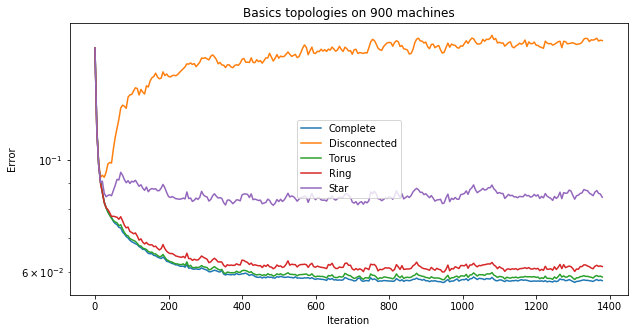

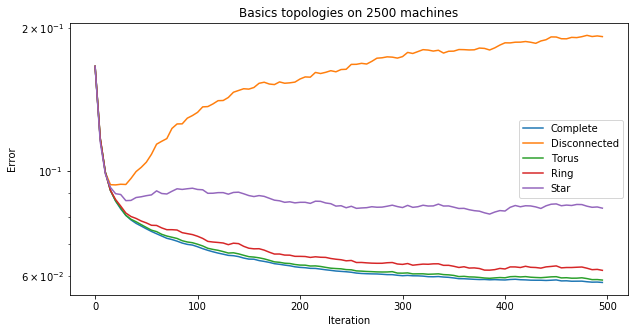

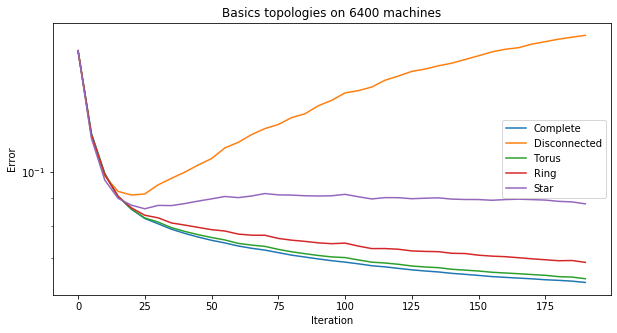

In [13]:
for i in range(len(n_machines)):
    iterations_indices = losses_complete[i][1]
    helpers.plot_losses(np.stack((losses_complete[i][0], losses_disconnected[i][0], losses_torus[i][0], losses_ring[i][0], losses_star[i][0])),
            iterations_indices, optimum_loss=optimum_loss, 
            labels=["Complete","Disconnected", "Torus", "Ring", "Star"], title="Basics topologies on {0} machines".format(n_machines[i]), save_as_pdf=True, pdf_name="Basics topologies on {0} machines".format(n_machines[i]))